## Importing necessary modules

In [62]:
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt

## Import data as a pandas dataframe and shuffling it

In [63]:
data = pd.read_csv("data.csv")
data = data.sample(frac=1)

## Preparing data
1. Data is split into inputs(X) and targets(y).
2. Data is converted into np arrays.
3. Inputs are normalised
4. Data is split into training set and testing set.

In [64]:
#Splitting data into inputs and targets
y = data[['Y1','Y2']]
X =  data[['X1','X2','X3','X4','X5','X6','X7','X8']]
y = np.array(y)
X = np.array(X)

#Normalising inputs
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Regression function

In [65]:
def regressor(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    testoutputs = model.predict(x_test)
    trainoutputs = model.predict(x_train)
    return [mean_squared_error(testoutputs,y_test),mean_squared_error(trainoutputs,y_train)]

## Neural Network Regression

In [78]:
from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(max_iter=5000)
result = regressor(MLP,X_train,y_train,X_test,y_test)
print("Neural Network testing values: ",result[0])
print("Neural Network training values: ",result[1])

Neural Network testing values:  7.545617054919244
Neural Network training values:  7.685283848040111


## Random Forest Regression

In [79]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
result = regressor(RFR,X_train,y_train,X_test,y_test)
print("Random Forest testing values: ",result[0])
print("Random Forest training values: ",result[1])

Random Forest testing values:  1.4006568842483706
Random Forest training values:  0.26569441808130123


## SVM Regression

In [81]:
from sklearn.svm import SVR

ytrain1,ytrain2=np.split(y_train,2,axis=1)
ytest1,ytest2=np.split(y_test,2,axis=1)

ytrain1 = ytrain1.flatten()
ytrain2 = ytrain2.flatten()
ytest1 = ytest1.flatten()
ytest2 = ytest2.flatten()


SVR1 = SVR()
result = regressor(SVR1,X_train,ytrain1,X_test,ytest1)
print("Support Vector Machine with Y1 testing values: ",result[0])
print("Support Vector Machine with Y2 training values: ",result[1],'\n')

SVR2 = SVR()
result = regressor(SVR2,X_train,ytrain2,X_test,ytest2)
print("Support Vector Machine with Y1 testing values: ",result[0])
print("Support Vector Machine with Y2 training values: ",result[1])

Support Vector Machine with Y1 testing values:  7.264741786285117
Support Vector Machine with Y2 training values:  7.266346372727266 

Support Vector Machine with Y1 testing values:  9.864849994437332
Support Vector Machine with Y2 training values:  9.558581383998115


## KFold Cross Validation

In [86]:
from sklearn.model_selection import KFold

kf5 = KFold(n_splits=5,random_state = 4, shuffle=True)

RFRvalues = []
MLPvalues = []
SVMY1values = []
SVMY2values = []


for train_index, test_index in kf5.split(X):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index],y[train_index], y[test_index]

    MLPvalues.append(regressor(MLP,X_train,y_train,X_test,y_test))
    RFRvalues.append(regressor(RFR,X_train,y_train,X_test,y_test))
    
    ytrain1,ytrain2=np.split(y_train,2,axis=1)
    ytest1,ytest2=np.split(y_test,2,axis=1)

    SVMY1values.append(regressor(SVR1,X_train,ytrain1.flatten(),X_test,ytest1.flatten()))
    SVMY2values.append(regressor(SVR2,X_train,ytrain2.flatten(),X_test,ytest2.flatten()))

## Splitting training and testing results to visualise them seperately

In [87]:
testRFR = []
testMLP = []
testSVMY1 = []
testSVMY2 = []

trainRFR = []
trainMLP = []
trainSVMY1 = []
trainSVMY2 = []

for i in range(len(RFRvalues)):
    testRFR.append(RFRvalues[i][0])
    testMLP.append(MLPvalues[i][0])
    testSVMY1.append(SVMY1values[i][0])
    testSVMY2.append(SVMY2values[i][0])
    
    trainRFR.append(RFRvalues[i][1])
    trainMLP.append(MLPvalues[i][1])
    trainSVMY1.append(SVMY1values[i][1])
    trainSVMY2.append(SVMY2values[i][1])

## Visualising Training Data

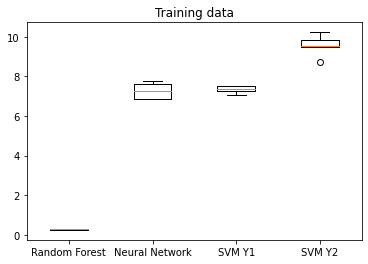

In [88]:
data = {'Random Forest': trainRFR, 'Neural Network': trainMLP, 'SVM Y1':trainSVMY1, 'SVM Y2':trainSVMY2}
fig, ax = plt.subplots()

ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
plt.title("Training data")

plt.show()

## Visualising Testing Data

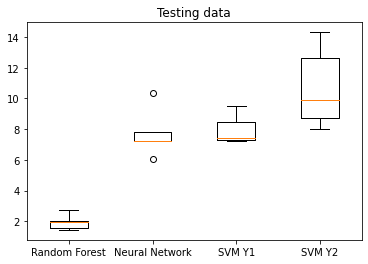

In [89]:
data = {'Random Forest': testRFR, 'Neural Network': testMLP, 'SVM Y1':testSVMY1, 'SVM Y2':testSVMY2}
fig, ax = plt.subplots()

ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
plt.title("Testing data")

plt.show()